In [63]:
import os, sys, re, json, time, csv, copy, random, unittest
import time
import itertools, collections

import numpy as np
from scipy import stats
import pandas as pd

import nltk

In [28]:
indir = '../book-nlp-master/data/tokens.gutenberg'
books = []
for root, dirs, filenames in os.walk(indir):
    for f in filenames:
         books.append(f)
print len(books)

avg_sent_lengths = []
total_tokens = []
total_sents = []

avg_char_sent_lengths = []
total_char_sents = []
# inQuotation = False
total_char_uttered_sents = []

for book_num, book in enumerate(books):
    print "Processing book: ", book_num, book
     
    df = pd.read_csv('../book-nlp-master/data/tokens.gutenberg/'+ book, sep='\t', quoting=csv.QUOTE_NONE)
    
    avg_sent_lengths.append(df['tokenId'].max() / df['sentenceID'].max())
    
    total_tokens.append(df['tokenId'].max())
    total_sents.append(df['sentenceID'].max())
    
    total_char_sents.append(len(df.query('characterId > -1')['sentenceID']))
    total_char_uttered_sents.append(len(df.query('characterId > -1 & inQuotation==False')['sentenceID']))
    
#     df_char = df[['sentenceID', 'originalWord', 'characterId']].groupby(['sentenceID', 'characterId']).agg(['count']).query('characterId > -1')
#     #print df_char.groupby(['characterId']).agg(['count'])
#     print df_char
#     if book_num == 0:
#         break


2998
Processing book:  0 Robert_Louis_Stevenson___Father_Damien.tokens
Processing book:  1 George_Bernard_Shaw___The_Miraculous_Revenge.tokens
Processing book:  2 Nathaniel_Hawthorne___True_Stories_from_History_and_Biography.tokens
Processing book:  3 Grant_Allen___Science_in_Arcady.tokens
Processing book:  4 James_Matthew_Barrie___Dear_Brutus.tokens
Processing book:  5 Alfred_Russel_Wallace___Is_Mars_Habitable?.tokens
Processing book:  6 Howard_Pyle___The_Merry_Adventures_of_Robin_Hood.tokens
Processing book:  7 Lewis_Carroll___Eight_or_Nine_Wise_Words_about_Letter-Writing.tokens
Processing book:  8 George_Alfred_Henty___March_to_Magdala.tokens
Processing book:  9 P_G_Wodehouse___The_Girl_on_the_Boat.tokens
Processing book:  10 Zane_Grey___The_Last_of_the_Plainsmen.tokens
Processing book:  11 Hector_Hugh_Munro___The_Chronicles_of_Clovis.tokens
Processing book:  12 William_Dean_Howells___Buying_a_Horse.tokens
Processing book:  13 Baronness_Orczy___"Unto_Caesar".tokens
Processing book: 

Total Tokens:  248741977
Minimum number of Tokens:  326 Abraham_Lincoln___Lincoln's_Gettysburg_Address,_given_November_19,_1863.tokens
Maximum number of Tokens:  2698886 John_Bunyan___The_Works_of_John_Bunyan.tokens
Most common number of Tokens:  ModeResult(mode=array([4894]), count=array([2]))
Average Tokens/Book:  82969
Std Deviation:  86503.4005088


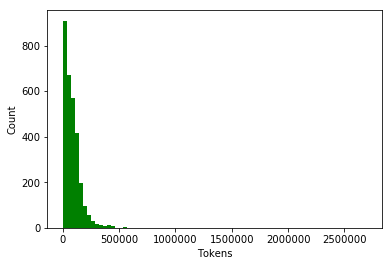

In [88]:

print "Total Tokens: ", sum(total_tokens)
print "Minimum number of Tokens: ", min(total_tokens), books[np.argmin(total_tokens)]
print "Maximum number of Tokens: ", max(total_tokens), books[np.argmax(total_tokens)]
print "Most common number of Tokens: ", stats.mode(total_tokens)
print "Average Tokens/Book: ", sum(total_tokens)/len(total_tokens)
print "Std Deviation: ", np.std(total_tokens)
n, bins, patches = plt.hist(total_tokens, 75, facecolor='green', alpha=1)
plt.xlabel('Tokens')
plt.ylabel('Count')



plt.show()

Total Sents:  11022168
Minimum number of Sents:  6 Abraham_Lincoln___The_Emancipation_Proclamation.tokens
Maximum number of Sents:  93298 John_Bunyan___The_Works_of_John_Bunyan.tokens
Most common number of Sents:  ModeResult(mode=array([122]), count=array([5]))
Average Sents/Book:  3676


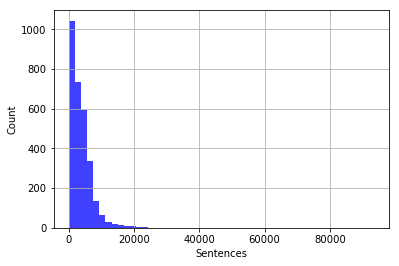

In [91]:
%matplotlib inline
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
print "Total Sents: ", sum(total_sents)
print "Minimum number of Sents: ", min(total_sents), books[np.argmin(total_sents)]
print "Maximum number of Sents: ", max(total_sents), books[np.argmax(total_sents)]
print "Most common number of Sents: ", stats.mode(total_sents)
print "Average Sents/Book: ", sum(total_sents)/len(total_sents)
# the histogram of the data
n, bins, patches = plt.hist(total_sents, 50,facecolor='blue', alpha=0.75)
plt.xlabel('Sentences')
plt.ylabel('Count')
plt.grid(True)

plt.show()

Total Sents:  8806241
Minimum number of Sents:  0 Nathaniel_Hawthorne___Beneath_an_Umbrella_(From_"Twice_Told_Tales").tokens
Maximum number of Sents:  45486 John_Bunyan___The_Works_of_John_Bunyan.tokens
Most common number of Sents:  ModeResult(mode=array([0]), count=array([30]))
Average Sents/Book:  2937


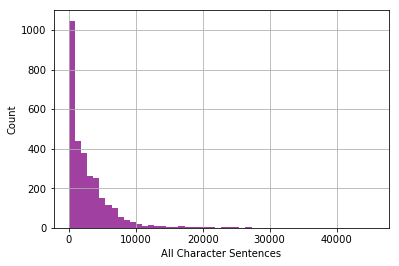

In [93]:
print "Total Sents: ", sum(total_char_sents)
print "Minimum number of Sents: ", min(total_char_sents), books[np.argmin(total_char_sents)]
print "Maximum number of Sents: ", max(total_char_sents), books[np.argmax(total_char_sents)]
print "Most common number of Sents: ", stats.mode(total_char_sents)
print "Average Sents/Book: ", sum(total_char_sents)/len(total_char_sents)
n, bins, patches = plt.hist(total_char_sents, 50,facecolor='purple', alpha=0.75)
plt.xlabel('All Character Sentences')
plt.ylabel('Count')
plt.grid(True)

plt.show()

Total Sents:  7380358
Minimum number of Sents:  0 Nathaniel_Hawthorne___Beneath_an_Umbrella_(From_"Twice_Told_Tales").tokens
Maximum number of Sents:  43861 John_Bunyan___The_Works_of_John_Bunyan.tokens
Most common number of Sents:  ModeResult(mode=array([0]), count=array([33]))
Average Sents/Book:  2461


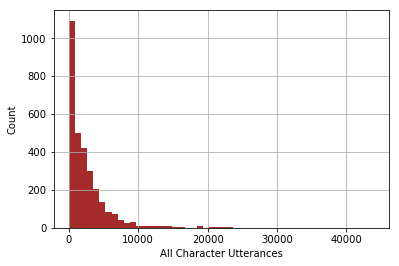

In [96]:
print "Total Sents: ", sum(total_char_uttered_sents)
print "Minimum number of Sents: ", min(total_char_uttered_sents), books[np.argmin(total_char_uttered_sents)]
print "Maximum number of Sents: ", max(total_char_uttered_sents), books[np.argmax(total_char_uttered_sents)]
print "Most common number of Sents: ", stats.mode(total_char_uttered_sents)
print "Average Sents/Book: ", sum(total_char_uttered_sents)/len(total_char_uttered_sents)
n, bins, patches = plt.hist(total_char_uttered_sents, 50,facecolor='brown', alpha=1)
plt.xlabel('All Character Utterances')
plt.ylabel('Count')
plt.grid(True)

plt.show()

In [ ]:
indir = '../book-nlp-master/data/tokens.gutenberg'
books = []
for root, dirs, filenames in os.walk(indir):
    for f in filenames:
         books.append(f)
print len(books)

total_characters = []
avg_char_sent_length = []

avg_char_sent_lengths = []
total_char_sents = []
# inQuotation = False
total_char_uttered_sents = []

for book_num, book in enumerate(books):
    print "Processing book: ", book_num, book
     
    df = pd.read_csv('../book-nlp-master/data/tokens.gutenberg/'+ book, sep='\t', quoting=csv.QUOTE_NONE)
    
    avg_sent_lengths.append(df['tokenId'].max() / df['sentenceID'].max())
    
    total_tokens.append(df['tokenId'].max())
    total_sents.append(df['sentenceID'].max())
    
    total_char_sents.append(len(df.query('characterId > -1')['sentenceID']))
    total_char_uttered_sents.append(len(df.query('characterId > -1 & inQuotation==False')['sentenceID']))
